<a href="https://colab.research.google.com/github/KhaerunniSalsaBillah/Tugas_Pembelajaran_Mesin/blob/main/Klasifikasi_Penipuan_Kartu_Kredit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KLASIFIKASI PENIPUAN KARTU KREDIT MENGGUNAKAN DECISION TREE

IMPORT PUSTAKA

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(rc = {"figure.figsize":(10, 6)}) #graph size

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

MEMBACA DATASET

In [ ]:
df = pd.read_csv("/content/sample_data/card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


Menampilkan info rinci seperti jumlah baris dan coloum, nama dan tipe data, jumlah nilai yg tdk null dan penggunaan memori

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233682 entries, 0 to 233681
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              233682 non-null  float64
 1   distance_from_last_transaction  233681 non-null  float64
 2   ratio_to_median_purchase_price  233681 non-null  float64
 3   repeat_retailer                 233681 non-null  float64
 4   used_chip                       233681 non-null  float64
 5   used_pin_number                 233681 non-null  float64
 6   online_order                    233681 non-null  float64
 7   fraud                           233681 non-null  float64
dtypes: float64(8)
memory usage: 14.3 MB


Menghitung nilai unik dalam kolom "fraud" kemudian memvisualisasikan distribusi nilai dalam kolom "fraud" menggunakan pie chart dengan persentase masing-masing nilai.

fraud
0.0    213404
1.0     20277
dtype: int64

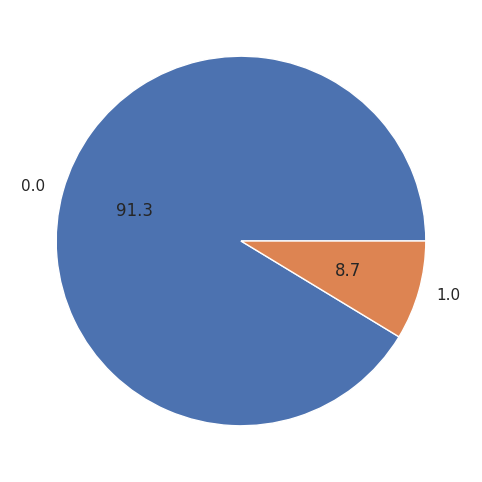

In [ ]:
df.value_counts("fraud").plot.pie(autopct = "%.1f")
df.value_counts("fraud")

Melakukan resampling pada dataset dengan tujuan membuat dataset baru yang memiliki jumlah observasi yang seimbang antara kelas "fraud" dan "non-fraud".

fraud
0.0    87403
1.0    87403
dtype: int64

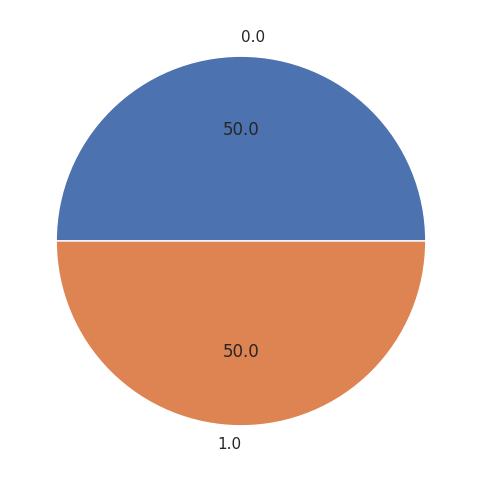

In [ ]:
real = df[df["fraud"] == 0]
fraud = df[df["fraud"] == 1]

# Resampling the original dataset with 87,403 datapoints for both classes
real_resample = real.sample(n=87403, random_state=123)
fraud_resample = fraud.sample(n=len(real_resample), replace=True, random_state=123)

# Creating new dataset consisting of equal class occurence
df0 = pd.concat([real_resample, fraud_resample], axis=0)

df0.value_counts("fraud").plot.pie(autopct = "%.1f")
df0.value_counts("fraud")

Mempersiapkan data untuk pemodelan

In [ ]:
X = np.array(df0.drop(columns = "fraud"))
y = np.array(df0["fraud"])

Membagi data set menjadi data latih dan data uji

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 123, shuffle = True)

Melalkukan scaling data untuk memastikan bahwa nilai-nilai fitur berada dalam rentang yang sama

In [ ]:
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

Decision Tree Classifier


In [ ]:
dt = DecisionTreeClassifier(random_state = 5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

Mengukur dan mencetak akurasi model Decision Tree Classifier, serta menampilkan laporan klasifikasi yang melibatkan berbagai metrik evaluasi

In [ ]:
accuracy = dt.score(X_test, y_test)
print("DT Accuracy:",accuracy)
print(classification_report(y_test, y_pred))

DT Accuracy: 0.999942795034609
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17502
         1.0       1.00      1.00      1.00     17460

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962



Visualisasi Pohon Keputusan

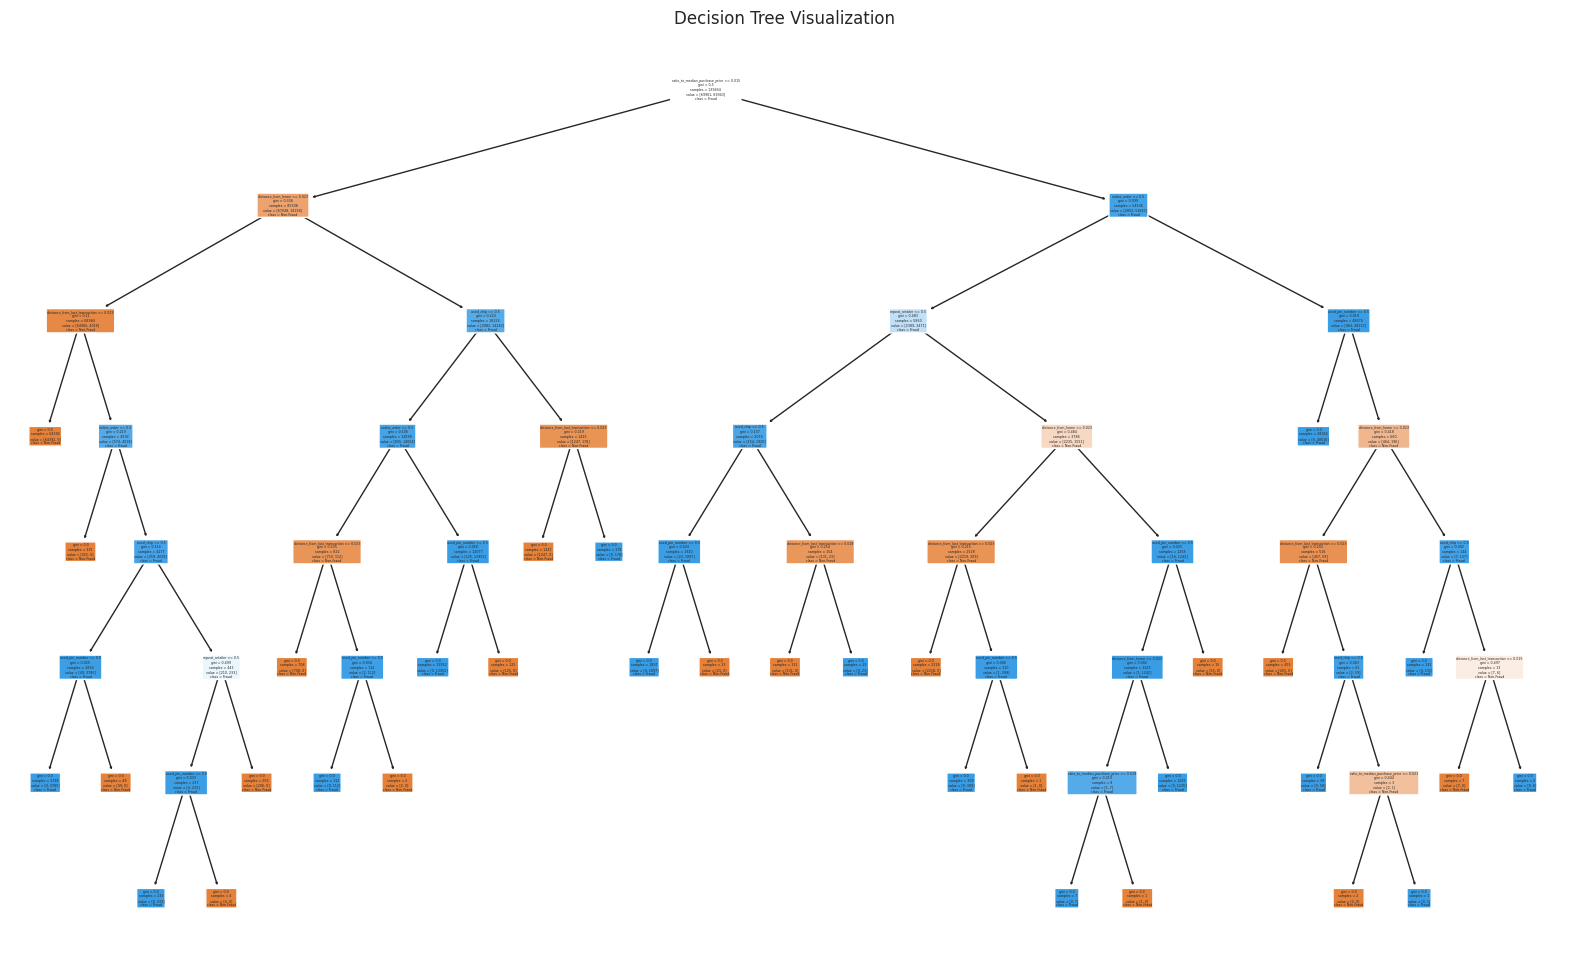

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
plot_tree(dt, feature_names=list(df0.columns[:-1]), class_names=["Non-Fraud", "Fraud"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()